## 선형 회귀 이용

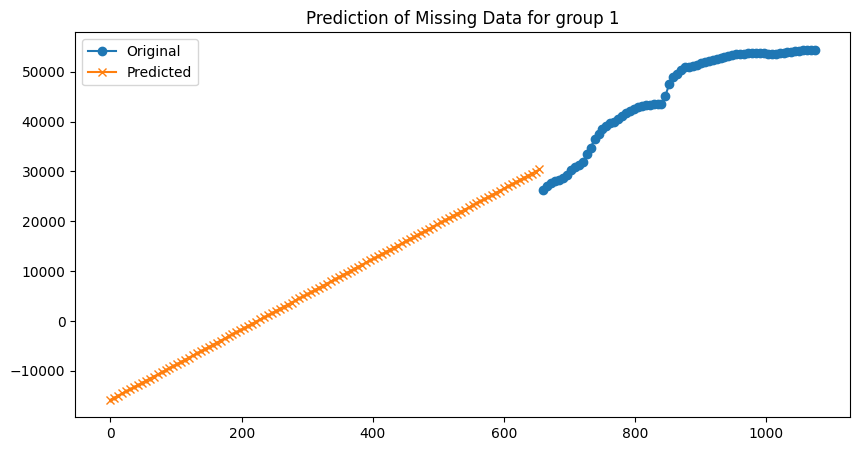

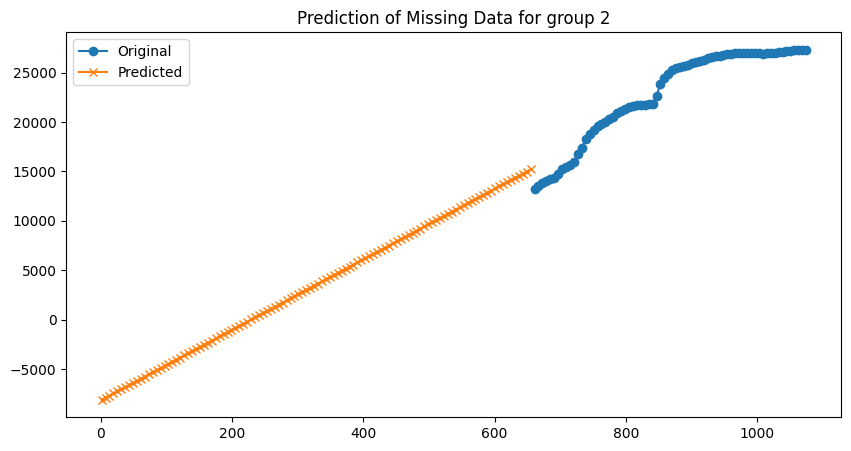

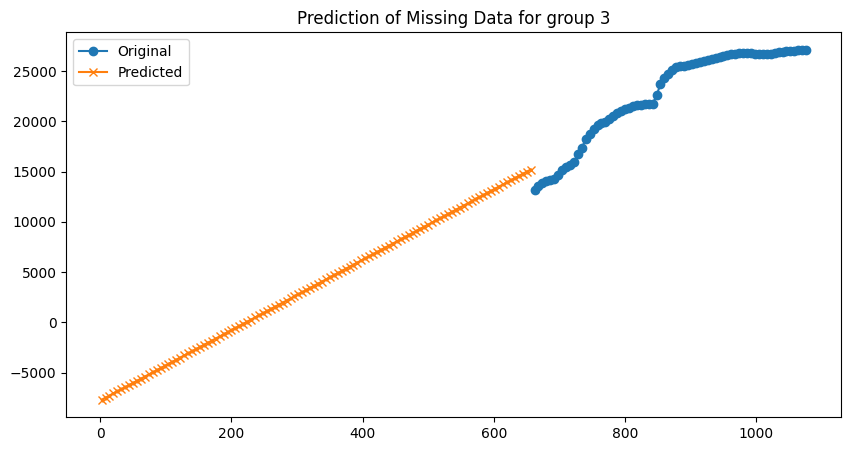

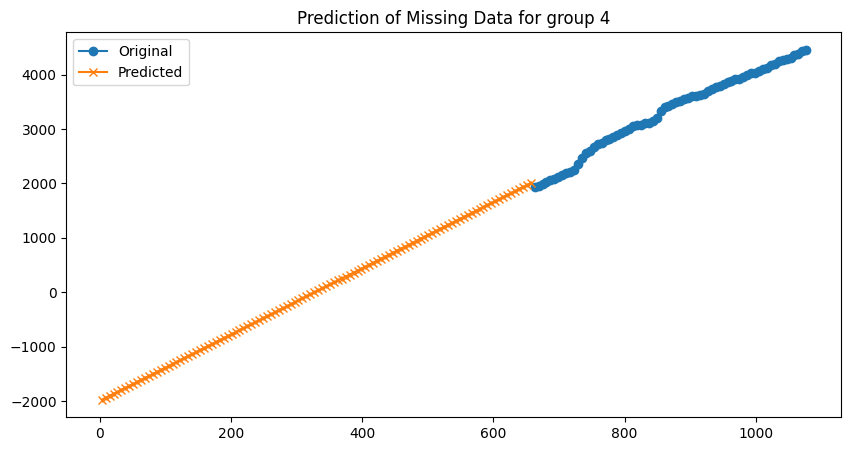

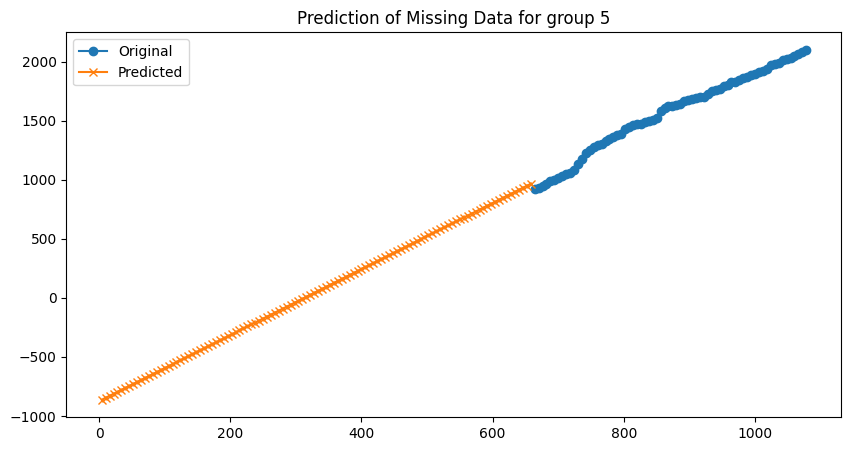

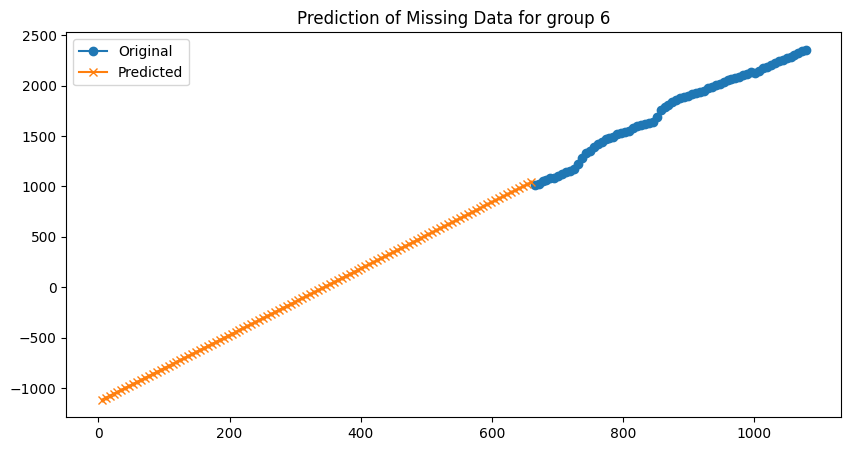

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 데이터프레임을 불러옵니다.
data = pd.read_excel('how3.xlsx')

data = data.T

# 첫 번째 행을 컬럼명으로 설정합니다.
data.columns = data.iloc[0]

# 첫 번째 행을 제거합니다.
data = data.iloc[1:]

# 인덱스를 재설정합니다.
data.reset_index(drop=True, inplace=True)

# 각 6개 행에 대해 반복합니다.
for j in range(6):
    
    

    # 모델을 초기화합니다. 각 반복마다 새로운 모델을 사용합니다.
    model = LinearRegression()

    # 결측치가 있는 행과 없는 행을 따로 저장할 데이터프레임을 만듭니다.
    train_data = pd.DataFrame()
    missing_data = pd.DataFrame()

    for i in range(j, len(data.index), 6):
        index = data.index[i]

        # 이 행에 결측치가 있는지 확인합니다.
        if pd.isnull(data.loc[index]).any():
            # 결측치가 있는 행은 missing_data에 추가합니다.
            missing_data = missing_data.append(data.loc[index])
        else:
            # 결측치가 없는 행은 train_data에 추가합니다.
            train_data = train_data.append(data.loc[index])

            
    
    # 선형회귀 모델을 학습시킵니다.
    model.fit(train_data.index.values.reshape(-1, 1), train_data)

    # 결측치를 예측합니다.
    predicted_values = model.predict(missing_data.index.values.reshape(-1, 1))

    # 예측한 값을 원래의 데이터에 채워넣습니다.
    data.loc[missing_data.index] = predicted_values

    # 원래 데이터와 예측한 데이터를 그래프로 그립니다.
    plt.figure(figsize=(10, 5))
    plt.plot(train_data.index, train_data, 'o-', label='Original')
    plt.plot(missing_data.index, predicted_values, 'x-', label='Predicted')
    plt.title("Prediction of Missing Data for group {}".format(j + 1))
    plt.legend()
    plt.show()

# 파일로 저장합니다.
data.to_csv('filled_data.csv')


## 다항 회귀 이용

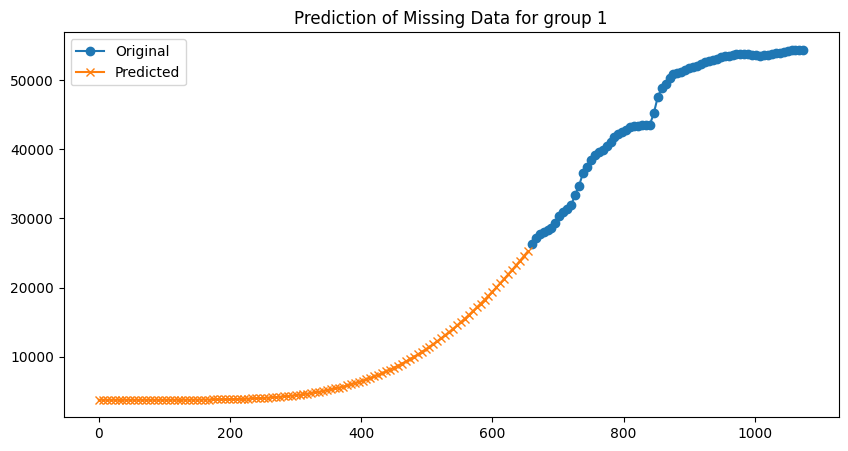

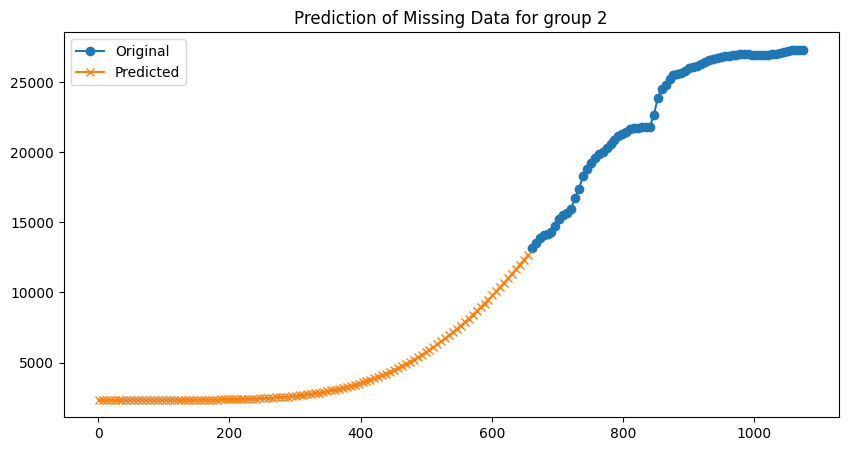

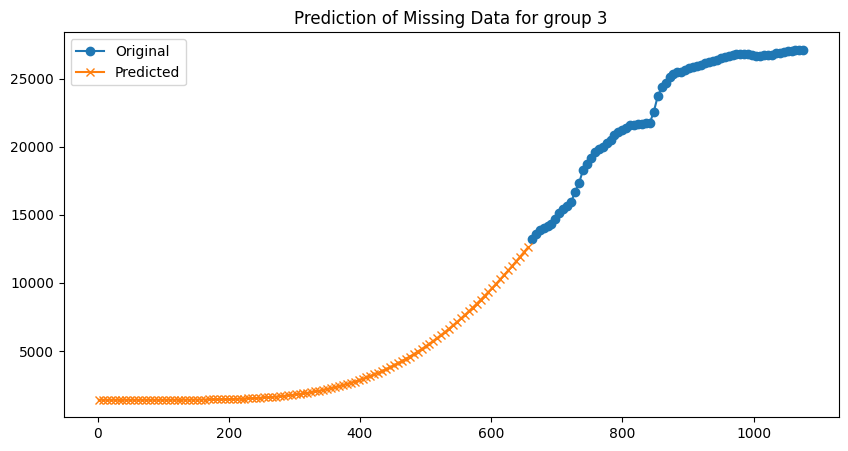

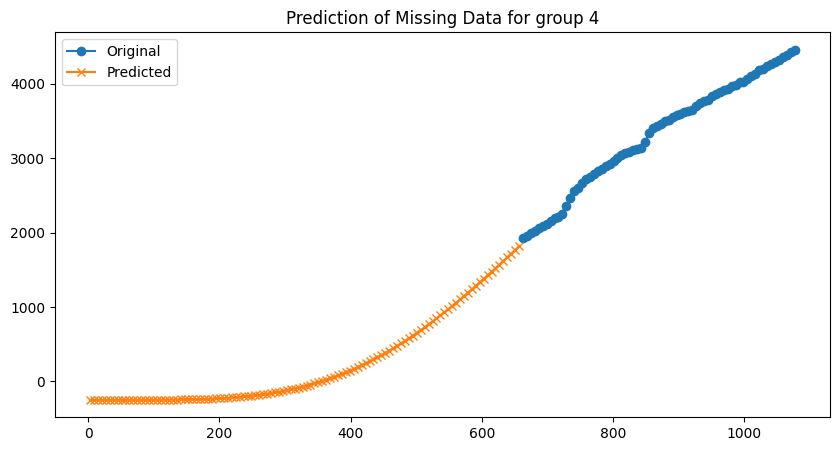

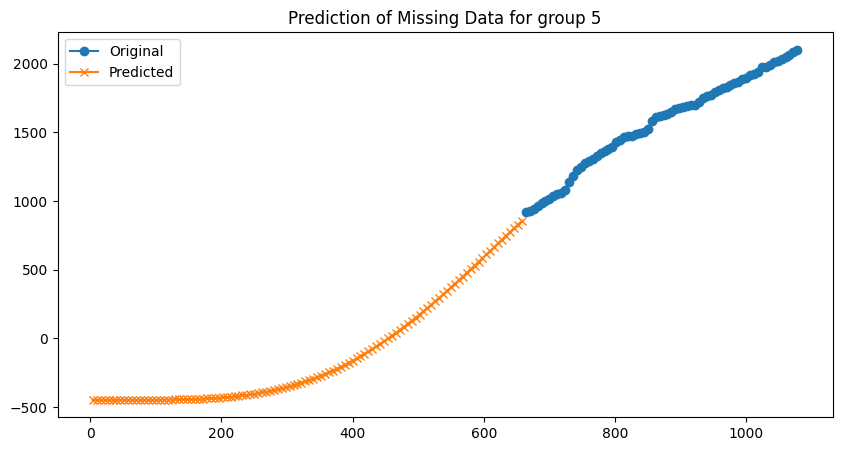

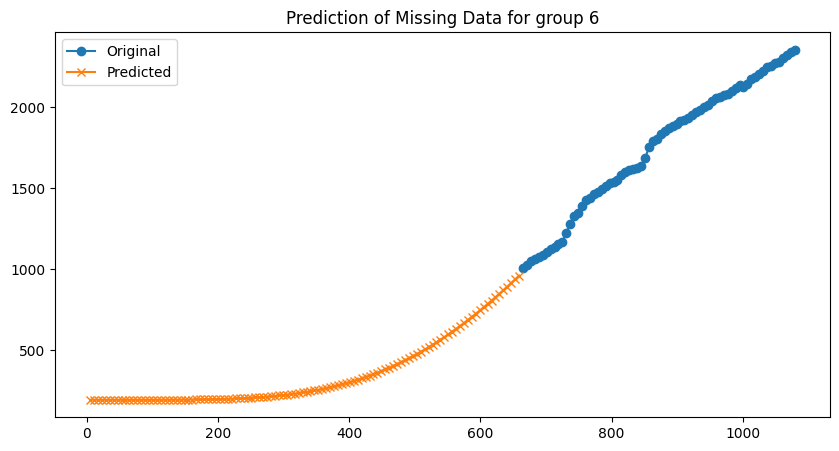

In [8]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 데이터프레임을 불러옵니다.
data = pd.read_excel('how3.xlsx')

data = data.T

# 첫 번째 행을 컬럼명으로 설정합니다.
data.columns = data.iloc[0]

# 첫 번째 행을 제거합니다.
data = data.iloc[1:]

# 인덱스를 재설정합니다.
data.reset_index(drop=True, inplace=True)

# 각 6개 행에 대해 반복합니다.
for j in range(6):
    
    # 모델을 초기화합니다. 각 반복마다 새로운 모델을 사용합니다.
    model = LinearRegression()

    # 결측치가 있는 행과 없는 행을 따로 저장할 데이터프레임을 만듭니다.
    train_data = pd.DataFrame()
    missing_data = pd.DataFrame()

    for i in range(j, len(data.index), 6):
        index = data.index[i]

        # 이 행에 결측치가 있는지 확인합니다.
        if pd.isnull(data.loc[index]).any():
            # 결측치가 있는 행은 missing_data에 추가합니다.
            missing_data = missing_data.append(data.loc[index])
        else:
            # 결측치가 없는 행은 train_data에 추가합니다.
            train_data = train_data.append(data.loc[index])

    # 다항 회귀를 위한 PolynomialFeatures를 생성합니다.    
    poly = PolynomialFeatures(degree=8)  # degree는 차수를 나타냅니다.

    x_train = train_data.index.values.reshape(-1, 1)
    y_train = train_data  # 여기를 실제 예측하려는 컬럼으로 변경해주세요.

    x_train_poly = poly.fit_transform(x_train)

    # 다항 회귀 모델을 학습시킵니다.
    model.fit(x_train_poly, y_train)

    # 결측치를 예측합니다.
    x_test = missing_data.index.values.reshape(-1, 1)
    x_test_poly = poly.transform(x_test)

    predicted_values = model.predict(x_test_poly)

    # 예측한 값을 원래의 데이터에 채워넣습니다.
    data.loc[missing_data.index] = predicted_values

    # 원래 데이터와 예측한 데이터를 그래프로 그립니다.
    plt.figure(figsize=(10, 5))
    plt.plot(x_train, y_train, 'o-', label='Original')
    plt.plot(x_test, predicted_values, 'x-', label='Predicted')
    plt.title("Prediction of Missing Data for group {}".format(j + 1))
    plt.legend()
    plt.show()

# 파일로 저장합니다.
data.to_csv('filled_data.csv')


## 다항 회귀의 cross_val_score 함수 사용 차수 설정

Best degree for group 1: 13


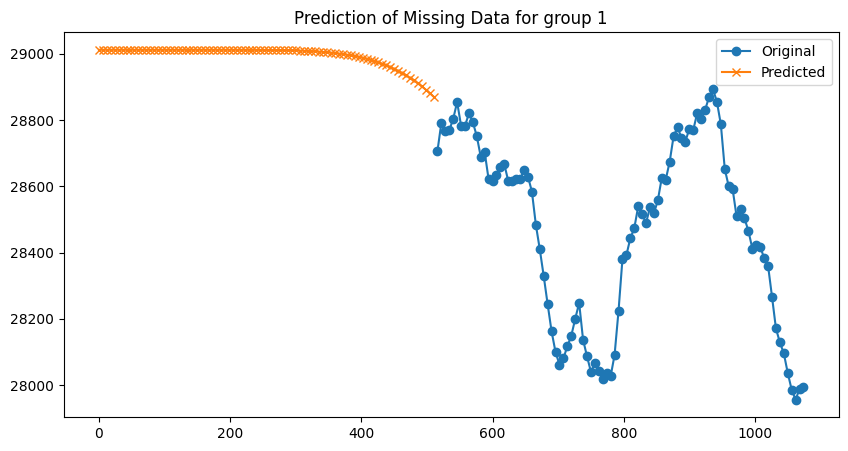

Best degree for group 2: 14


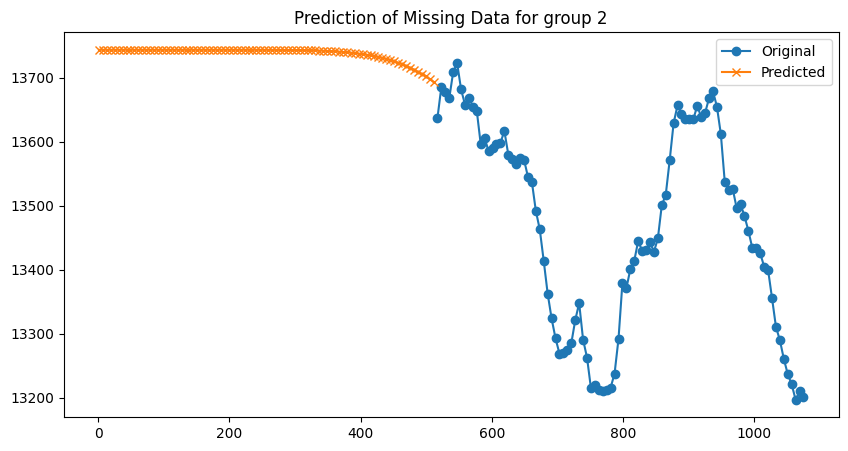

Best degree for group 3: 13


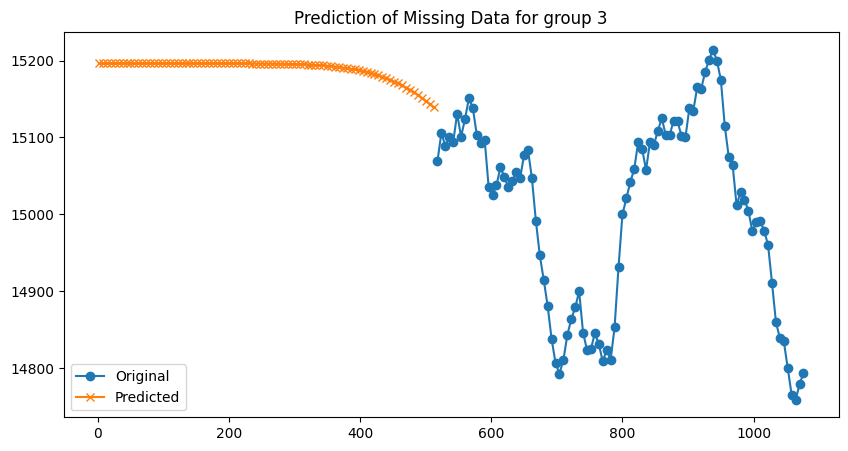

Best degree for group 4: 9


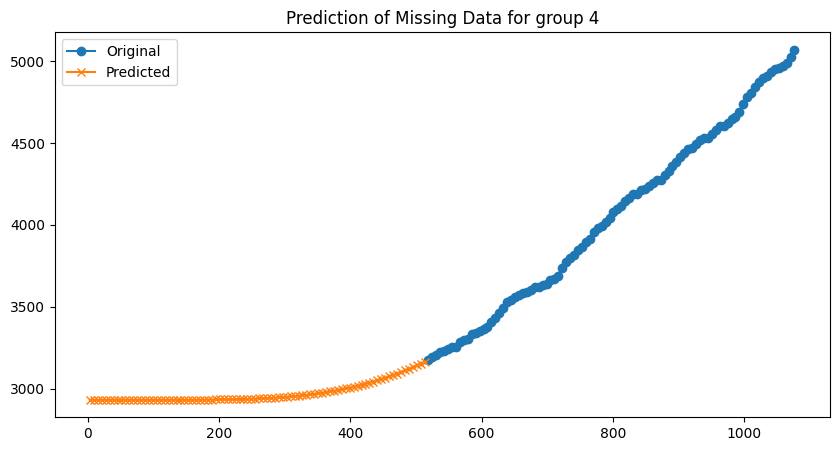

Best degree for group 5: 7


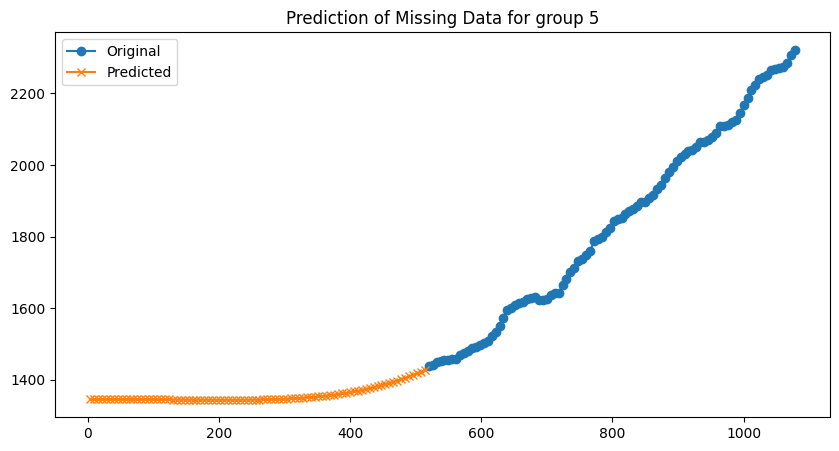

Best degree for group 6: 11


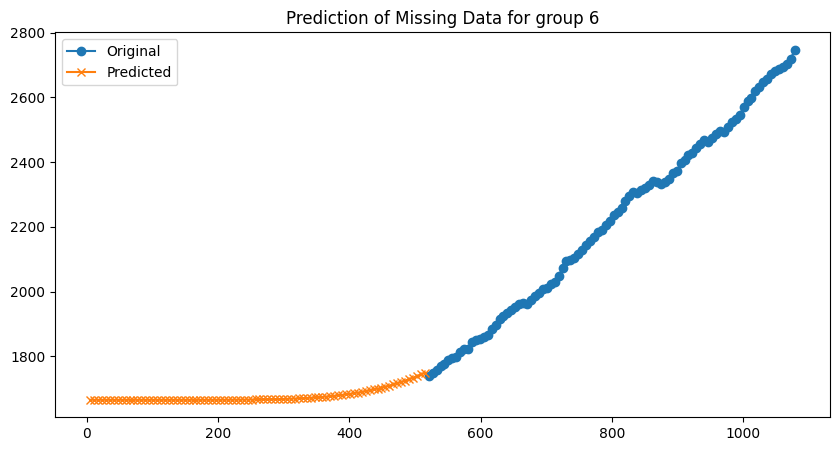

In [20]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# 데이터프레임을 불러옵니다.
data = pd.read_excel('how5.xlsx')

data = data.T

# 첫 번째 행을 컬럼명으로 설정합니다.
data.columns = data.iloc[0]

# 첫 번째 행을 제거합니다.
data = data.iloc[1:]

# 인덱스를 재설정합니다.
data.reset_index(drop=True, inplace=True)

# 각 6개 행에 대해 반복합니다.
for j in range(6):
    best_degree = 0
    min_mse = np.inf

    # 결측치가 있는 행과 없는 행을 따로 저장할 데이터프레임을 만듭니다.
    train_data = pd.DataFrame()
    missing_data = pd.DataFrame()

    for i in range(j, len(data.index), 6):
        index = data.index[i]

        # 이 행에 결측치가 있는지 확인합니다.
        if pd.isnull(data.loc[index]).any():
            # 결측치가 있는 행은 missing_data에 추가합니다.
            missing_data = missing_data.append(data.loc[index])
        else:
            # 결측치가 없는 행은 train_data에 추가합니다.
            train_data = train_data.append(data.loc[index])

    x_train = train_data.index.values.reshape(-1, 1)
    y_train = train_data  # 여기를 실제 예측하려는 컬럼으로 변경해주세요.

    # 차수 1부터 10까지 검사합니다.
    for degree in range(4, 20):
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)

        model = LinearRegression()

        # cross_val_score를 이용한 교차 검증을 수행합니다.
        scores = cross_val_score(model, x_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
        mse = np.mean(np.abs(scores))

        if mse < min_mse:
            min_mse = mse
            best_degree = degree

    print(f"Best degree for group {j+1}: {best_degree}")

    # 최적의 차수로 모델을 학습시킵니다.
    poly = PolynomialFeatures(degree=best_degree)
    x_train_poly = poly.fit_transform(x_train)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # 결측치를 예측합니다.
    x_test = missing_data.index.values.reshape(-1, 1)
    x_test_poly = poly.transform(x_test)

    predicted_values = model.predict(x_test_poly)

    # 예측한 값을 원래의 데이터에 채워넣습니다.
    data.loc[missing_data.index] = predicted_values.round(0)

    # 원래 데이터와 예측한 데이터를 그래프로 그립니다.
    plt.figure(figsize=(10, 5))
    plt.plot(x_train, y_train, 'o-', label='Original')
    plt.plot(x_test, predicted_values, 'x-', label='Predicted')
    plt.title("Prediction of Missing Data for group {}".format(j + 1))
    plt.legend()
    plt.show()

# 파일로 저장합니다.
data.to_csv('filled_data.csv')


## 서로 다른 파라미터로 예측하였기에 전체 수 기반 비율 조정

In [21]:
import pandas as pd
import numpy as np

# CSV 파일을 불러옵니다.
data = pd.read_csv('filled_data.csv', index_col=0)

# 예측값을 정수로 변환합니다.
data = data.round(0).astype(int)

# 그룹별로 데이터를 분리합니다.
group1 = data.iloc[::6, :].reset_index(drop=True)
group2 = data.iloc[1::6, :].reset_index(drop=True)
group3 = data.iloc[2::6, :].reset_index(drop=True)
group4 = data.iloc[3::6, :].reset_index(drop=True)
group5 = data.iloc[4::6, :].reset_index(drop=True)
group6 = data.iloc[5::6, :].reset_index(drop=True)

# group1, group2, group3에 대한 조정
ratio2 = group2 / (group2 + group3)
ratio3 = 1 - ratio2

group2 = (ratio2 * group1).round(0).astype(int)
group3 = group1 - group2

# group4, group5, group6에 대한 조정
ratio5 = group5 / (group5 + group6)
ratio6 = 1 - ratio5

group5 = (ratio5 * group4).round(0).astype(int)
group6 = group4 - group5

# 데이터를 원래대로 복원합니다.
data.iloc[::6, :] = group1.values
data.iloc[1::6, :] = group2.values
data.iloc[2::6, :] = group3.values
data.iloc[3::6, :] = group4.values
data.iloc[4::6, :] = group5.values
data.iloc[5::6, :] = group6.values

# 파일로 저장합니다.
data.to_csv('filled_data.csv')


In [25]:
data = pd.read_csv('algetta.csv',encoding='cp949')

data = data.T
data.to_csv('present.csv')
